In [1]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
sns.set_style("whitegrid")
sns.set()

In [2]:
df = pd.read_csv('house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data = df.drop(["id","date", "lat","long","zipcode"],axis=1) 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [4]:
print("Summary Statistics:\n")
sumary = data.describe(percentiles=[])
print(np.transpose(np.round(sumary)))

Summary Statistics:

                 count      mean       std      min       50%        max
price          21613.0  540088.0  367127.0  75000.0  450000.0  7700000.0
bedrooms       21613.0       3.0       1.0      0.0       3.0       33.0
bathrooms      21613.0       2.0       1.0      0.0       2.0        8.0
sqft_living    21613.0    2080.0     918.0    290.0    1910.0    13540.0
sqft_lot       21613.0   15107.0   41421.0    520.0    7618.0  1651359.0
floors         21613.0       1.0       1.0      1.0       2.0        4.0
waterfront     21613.0       0.0       0.0      0.0       0.0        1.0
view           21613.0       0.0       1.0      0.0       0.0        4.0
condition      21613.0       3.0       1.0      1.0       3.0        5.0
grade          21613.0       8.0       1.0      1.0       7.0       13.0
sqft_above     21613.0    1788.0     828.0    290.0    1560.0     9410.0
sqft_basement  21613.0     292.0     443.0      0.0       0.0     4820.0
yr_built       21613.0    1971

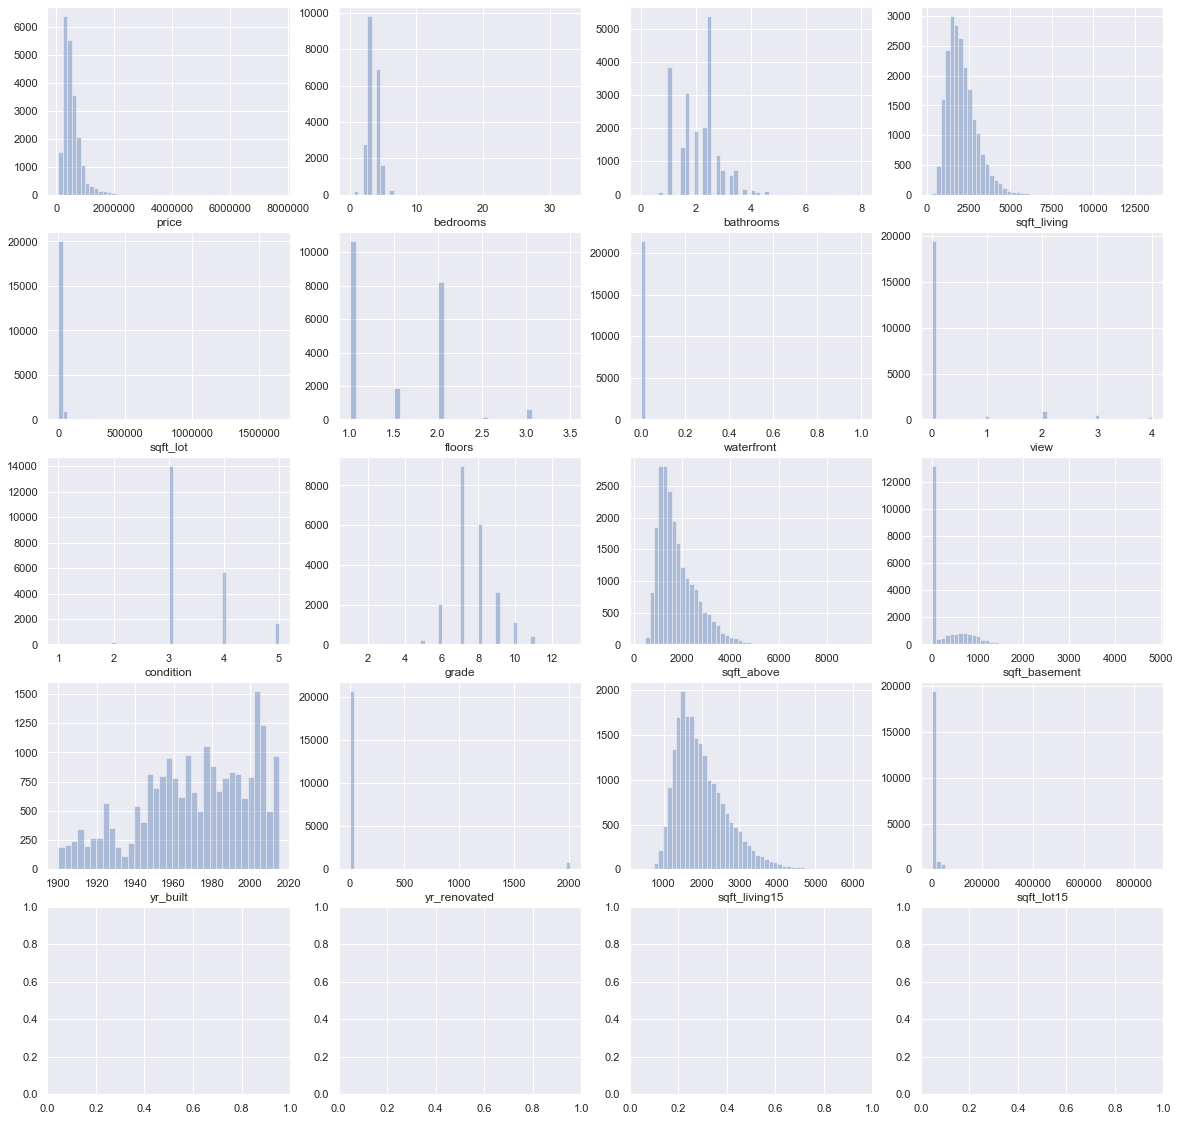

In [5]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, feature in zip(axes.flat, data.columns):
    sns.distplot(data[feature], ax=ax, kde=False)

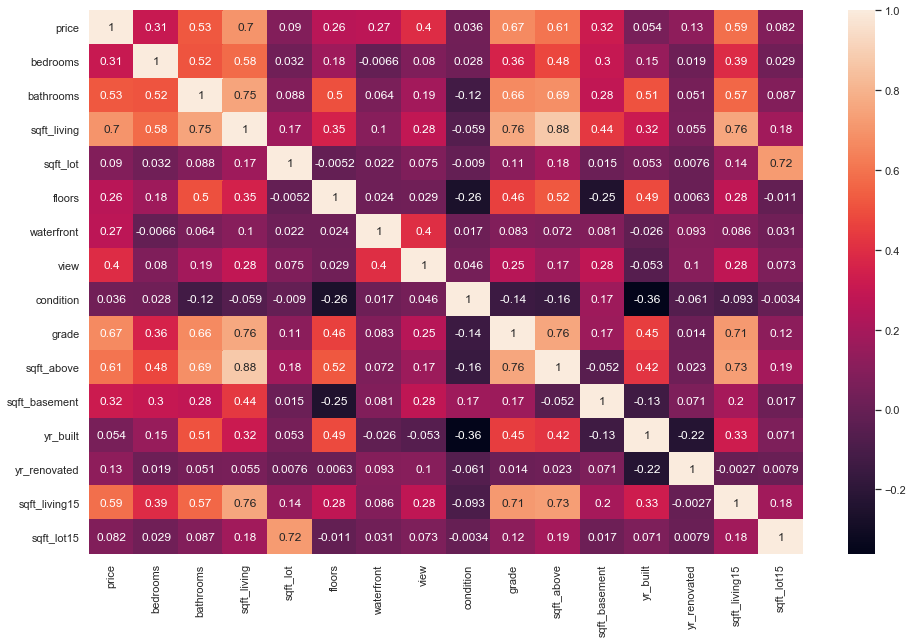

In [6]:
#Heatmap plot for correlation
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)

In [7]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287


In [8]:
data_sqft = data.filter(regex='sqft').copy()

In [9]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(data)

No Clusters = 2  Silhouette =  0.271
No Clusters = 3  Silhouette =  0.196
No Clusters = 4  Silhouette =  0.208
No Clusters = 5  Silhouette =  0.211
No Clusters = 6  Silhouette =  0.221
No Clusters = 7  Silhouette =  0.237
No Clusters = 8  Silhouette =  0.221
No Clusters = 9  Silhouette =  0.221


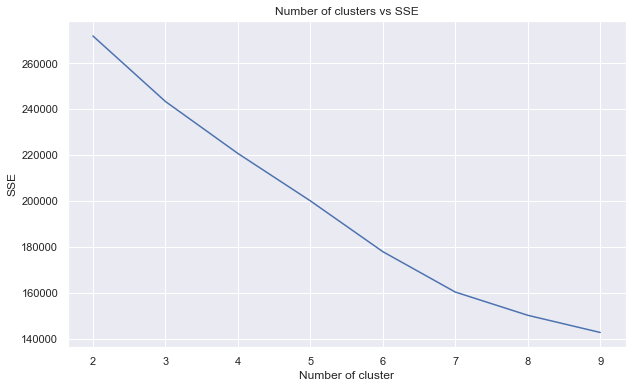

In [10]:
clusters = 10
sse = {}

for i in range(2, clusters):
    
    kmeans = KMeans(n_clusters=i,init="k-means++", n_init = 10, max_iter= 100, random_state=42, n_jobs=-1)
    kmeans.fit(X_std) 

    goodness = silhouette_score(X_std,kmeans.predict(X_std)).round(3)
    print("No Clusters =", i," Silhouette = ",goodness)
    
    sse[i] = kmeans.inertia_ #SSE of each point to its centroid
    
plt.figure(figsize=(10,6))
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Number of clusters vs SSE")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [14]:
temp = data
temp["Cluster"] = kmeans.predict(X_std)
# find number of members in each cluster
count = temp.groupby('Cluster')['Cluster'].count()
# find cluster averages
cluster_means = np.round(temp.groupby(['Cluster']).mean(),decimals=3)

In [15]:
cluster_means['Count'] = count
print(np.transpose(cluster_means))

Cluster                  0           1           2           3           4  \
price          1575497.391  679626.661  355056.220  529182.558  610570.757   
bedrooms             4.418       3.951       2.790       3.857       3.312   
bathrooms            3.675       2.702       1.355       2.203       2.372   
sqft_living       4586.519    2941.679    1306.655    2231.292    2663.849   
sqft_lot         26974.088   15564.807    9662.170   12060.993  259374.085   
floors               1.931       1.962       1.095       1.128       1.550   
waterfront           0.000       0.000       0.000       0.000       0.000   
view                 0.938       0.050       0.045       0.030       0.524   
condition            3.304       3.139       3.494       3.825       3.312   
grade               10.477       8.821       6.729       7.474       8.066   
sqft_above        3838.713    2835.468    1198.446    1488.091    2419.196   
sqft_basement      747.806     106.211     108.209     743.201  

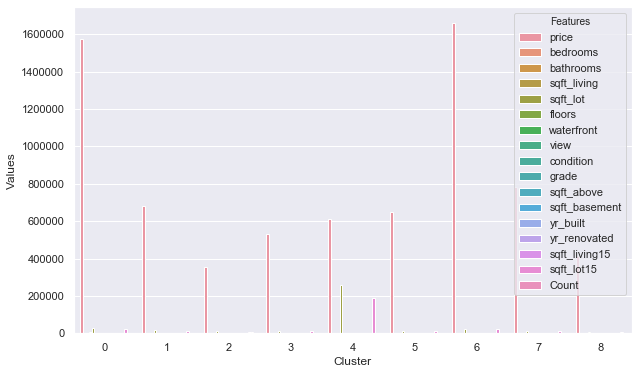

In [16]:
#put table into dataframe, reshape for barplot
cluster_df = pd.DataFrame(np.transpose(cluster_means)).iloc[0:18,:] #drop count
cluster_df = cluster_df.reset_index()
cluster_df = cluster_df.rename(columns={'index': 'Features'})
clus_df_melt = pd.melt(cluster_df, id_vars="Features", var_name="Cluster", value_name="Values")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=clus_df_melt,x="Cluster",y="Values",hue="Features")